In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

In [3]:
data = pd.read_csv("C:\\Users\\SPURGE\\Desktop\\SCMA\\data\\NSSO68.csv",low_memory=False)

In [4]:
df = data[data['state_1'] == 'MP']

In [5]:
print("Dataset Information:")
print(df.columns)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)


In [6]:
print(df.head())

      slno       grp  Round_Centre  FSU_number  Round  Schedule_Number  \
2091  2092  4.13E+31             1       41310     68               10   
2092  2093  4.13E+31             1       41310     68               10   
2093  2094  4.13E+31             1       41310     68               10   
2094  2095  4.13E+31             1       41310     68               10   
2095  2096  4.13E+31             1       41310     68               10   

      Sample  Sector  state  State_Region  ...  pickle_v  sauce_jam_v  \
2091       1       2     23           231  ...       0.0          0.0   
2092       1       2     23           231  ...       0.0          0.0   
2093       1       2     23           231  ...       0.0          0.0   
2094       1       2     23           231  ...       0.0          0.0   
2095       1       2     23           231  ...       0.0          0.0   

      Othrprocessed_v  Beveragestotal_v  foodtotal_v  foodtotal_q  state_1  \
2091              0.0         36.00000

In [7]:
print(df.shape)

(4717, 384)


In [8]:
missing_info = df.isnull().sum()
print("Missing Values Information:")
print(missing_info)

Missing Values Information:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [9]:
mpnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

In [10]:
mpnew['Meals_At_Home'].fillna(mpnew['Meals_At_Home'].mean(), inplace=True)

C:\Users\SPURGE\AppData\Local\Temp\ipykernel_6060\411358513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpnew['Meals_At_Home'].fillna(mpnew['Meals_At_Home'].mean(), inplace=True)


In [11]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    mpnew = remove_outliers(mpnew, col)

In [19]:
mpnew['total_consumption'] = mpnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)



In [20]:
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
    return summary

district_summary = summarize_consumption(mpnew, 'District')

In [21]:
# Create a data frame for district codes and names
district_mapping_df = pd.DataFrame({
    "District_Code": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", 
                      "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", 
                      "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44", "45", "46",
                      "47", "48", "49", "50"],
    "District_Name": ["Sheopur", "Morena", "Bhind", "Gwalior", "Datia", "Shivpuri", "Guna", "Tikamgarh", "Chhatarpur", "Panna",
                      "Sagar", "Damoh", "Satna", "Rewa", "Umaria", "Shahdol", "Sidhi", "Neemuch", "Mandsaur",
                      "Ratlam", "Ujjain", "Shajapur", "Dewas", "Jhabua", "Dhar", "Indore", "West Nimar", "Barwani",
                      "East Nimar", "Rajgarh", "Vidisha", "Bhopal", "Sehore", "Raisen", "Betul", "Harda",
                      "Hoshangabad", "Katni", "Jabalpur", "Narsimhapur", "Dindori", "Mandla", "Chhindwara",
                      "Seoni", "Balaghat", "Ashoknagar", "Anuppur", "Burhanpur", "Alirajpur", "Singrauli"]
})

In [22]:
# Ensure the District column is of type object for merging
district_summary['District'] = district_summary['District'].astype(str)


In [23]:
# Merge district_summary with district_mapping_df to replace codes with names
district_summary = district_summary.merge(district_mapping_df, how='left', left_on='District', right_on='District_Code')
district_summary = district_summary[['District_Name', 'total_consumption']].rename(columns={'District_Name': 'District', 'total_consumption': 'total'})

In [24]:

print("Top Consuming Districts:")
print(district_summary.head(4))

Top Consuming Districts:
    District        total
0     Ujjain  1163.419995
1     Indore   916.912049
2      Bhind   880.732053
3  Tikamgarh   826.475000


In [25]:
district_mapping = {"1" : " Ujjain", "2" : "Indore", "3" : " Bhind  ", "4" : "Tikamgarh"}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

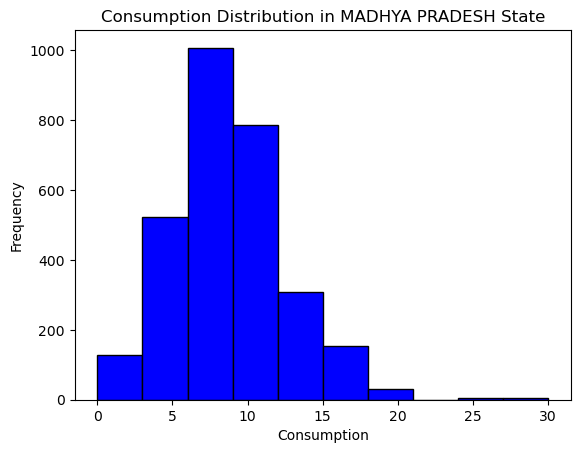

In [26]:
mpnew['District'] = mpnew['District'].astype(str).map(district_mapping).fillna(mpnew['District'])
mpnew['Sector'] = mpnew['Sector'].astype(str).map(sector_mapping).fillna(mpnew['Sector'])
plt.hist(mpnew['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in MADHYA PRADESH State')
plt.show()

In [31]:
# Sample data frame for demonstration, replace with your actual dataframe
mpnew = pd.DataFrame({
    'District': [ " Ujjain", "Indore",  " Bhind  ", "Tikamgarh"],
    'total_consumption': [1163.419995, 916.912049,  880.732053, 826.475000]
})

In [32]:
# Group by 'District' and sum 'total_consumption'
MP_consumption = mpnew.groupby('District')['total_consumption'].sum().reset_index()

In [33]:
# Convert 'District' to categorical type
MP_consumption['District'] = MP_consumption['District'].astype('category')

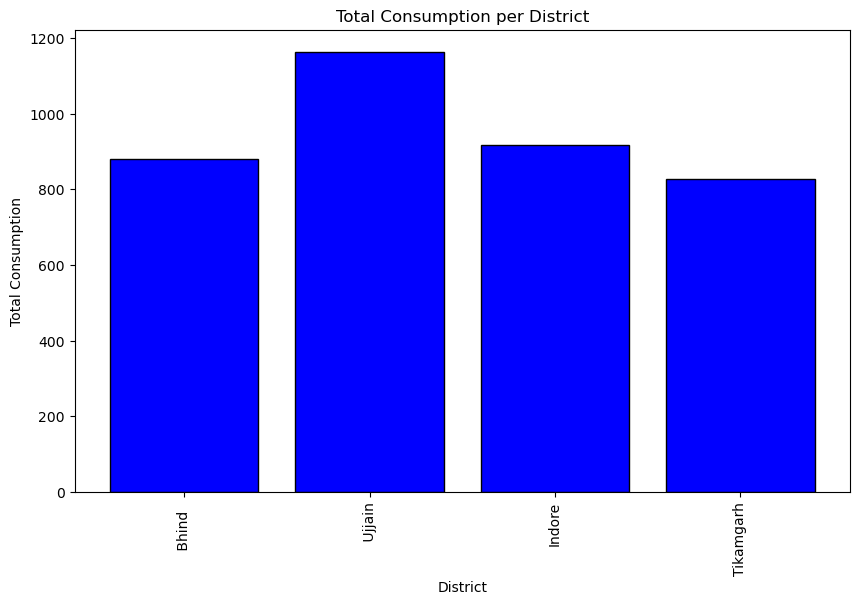

In [34]:

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(MP_consumption['District'], MP_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel('District')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per District')
plt.xticks(rotation=90)
plt.show()

In [47]:
data_map = gpd.read_file("C:\\Users\\SPURGE\\Desktop\\SCMA\\MADHYA PRADESH_DISTRICTS.geojson")

In [48]:
data_map = data_map.rename(columns={'dtname': 'District'})
data_map_data = data_map.merge(MP_consumption, on='District')

<Axes: >

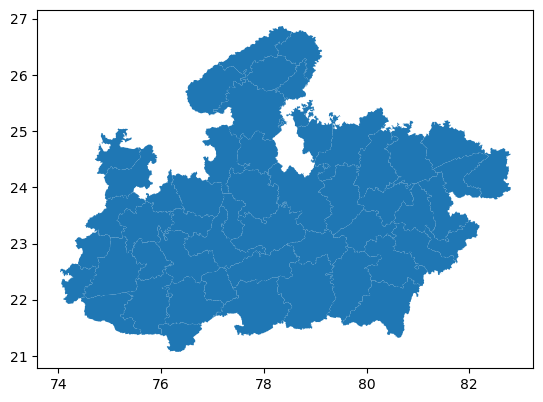

In [49]:
#plot the map
data_map.plot()

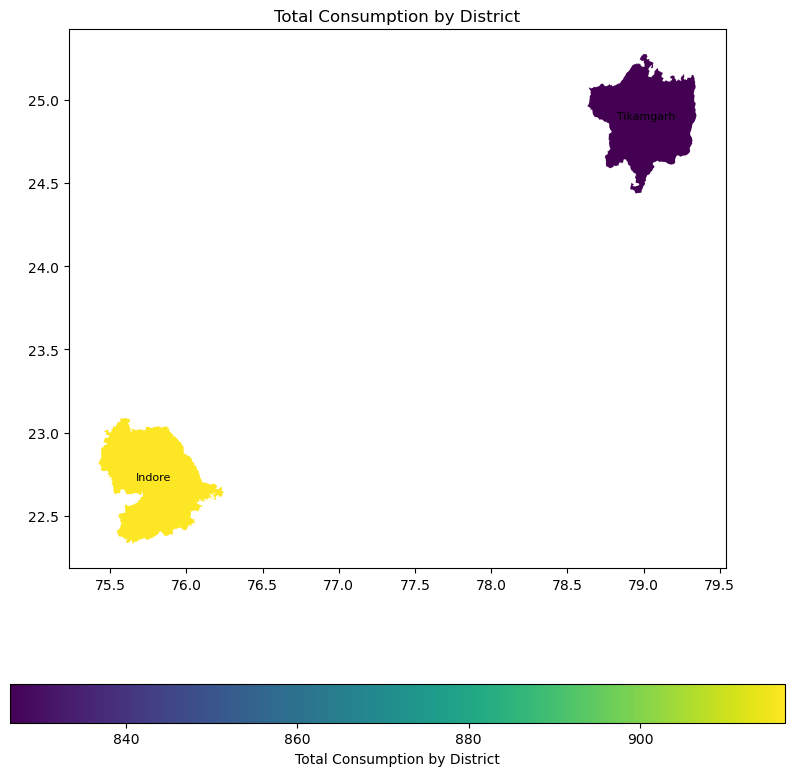

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data_map_data.plot(column='total_consumption', ax=ax, legend=True, legend_kwds={'label': "Total Consumption by District",
                        'orientation': "horizontal"})
data_map_data.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)
plt.title("Total Consumption by District")
plt.show()